In [ ]:
#let's train a linear regression model using this data "dm_office_sales.csv"
#for that we will first separate out X ie features from label ie y
#then we will Train/Test split the data
#we don't need to normalize continuous valued output column/target label
#as that's what we want to predict in the real-world, hence don't change its value
#then we will fit a normalization model on feature vectors only of Train data ir X_Train by calling fit()
#as we do not want to assume any information from the Test dataset otherwise it will result in data leakage
#we do not want any information leaking from the Test dataset or pre-conceived distribution of Test set, 
# so we use fit() method of StandardScaler for X_Train only
# Then it basically learns mean and standard deviation of Train dataset, to scale X_train values feature wise mean centered 
#use this Normalizer object on feature vectors only of Test data ie X_Test by calling transform() 
#as we want to handle pre-processing of X_Train/X_Test using handled similar methods
#our objective is to predict sales using 5 input features where first 2 features are categorical, and next 3 features are numeric
#also each numeric feature is measuring things under different units

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("dm_office_sales.csv")

In [30]:
df.head()

,division,level of education,training level,work experience,salary,sales
0,printers,some college,2,6,91684,372302
1,printers,associate's degree,2,10,119679,495660
2,peripherals,high school,0,9,82045,320453
3,office supplies,associate's degree,2,5,92949,377148
4,office supplies,high school,1,5,71280,312802


In [32]:
df.shape

(1000, 6)

In [3]:
X=df.iloc[:,:-1] #.values
y=df.iloc[:,-1] #.values #turn df to NumPy array

In [ ]:
#help(train_test_split)

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=402)
#if we want to compare multiple ml models, they must have same train/test split, random state =same no ensures it.

In [61]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
encoder=OneHotEncoder(sparse_output=False,drop='first')
#drop=first to avoid dummy variable trap
scaler=StandardScaler()


In [62]:
X_train

,division,level of education,training level,work experience,salary
726,office supplies,bachelor's degree,2,7,97227
397,printers,associate's degree,1,3,74037
128,computer software,associate's degree,1,10,115164
207,office supplies,some college,2,4,81063
741,office supplies,associate's degree,2,9,111905
...,...,...,...,...,...
990,printers,some college,0,3,68353
202,printers,associate's degree,2,10,122390
326,office supplies,some college,1,4,77702
6,peripherals,associate's degree,0,5,77548


In [63]:
#fit OHE categorical columns for X_train
encoder.fit(X_train[['division','level of education']])

OneHotEncoder(drop='first', sparse_output=False)

In [64]:
#Scale numeric values column wise for X_train
scaler.fit(X_train[['training level','work experience','salary']])

StandardScaler()

In [65]:
#once you fit OHE encoder and scaler on X_train, use it to get transformed X_train vectors
encoded_data_ohe=encoder.transform(X_train[['division','level of education']])

In [66]:
encoded_data_ohe.shape

(700, 8)

In [67]:
X_train_numeric_scaled=scaler.transform(X_train[['training level','work experience','salary']])

In [68]:
X_train_numeric_scaled.shape

(700, 3)

In [69]:
#to concatenate column-wise 2 numpy arrays
X_train_transf=np.hstack((encoded_data_ohe,X_train_numeric_scaled))

In [70]:
X_train_transf.shape


(700, 11)

In [71]:
# OR using concatenate
#X_train_transf = np.concatenate((encoded_data_ohe, X_train_numeric_scaled), axis=1)

In [72]:
# Now repeat same pre-processing steps for X_Test to avoid any data leaking
#for deployment you will get Test data separately
encoded_data_ohe_test=encoder.transform(X_test[['division','level of education']])
X_test_numeric_scaled=scaler.transform(X_test[['training level','work experience','salary']])
X_test_transf=np.hstack((encoded_data_ohe_test,X_test_numeric_scaled))


In [73]:
X_test_transf.shape

(300, 11)

In [74]:
from sklearn.neural_network import MLPRegressor

In [77]:
model=MLPRegressor(hidden_layer_sizes=(100,100),activation='relu',solver='adam',random_state=402,max_iter=10000,learning_rate='invscaling',verbose=True,learning_rate_init=0.0001,batch_size=8,)

In [78]:
model.fit(X_train_transf,y_train)

Iteration 1, loss = 64125871494.71128082
Iteration 2, loss = 64125571649.25860596
Iteration 3, loss = 64125105764.99900818
Iteration 4, loss = 64124355352.27156067
Iteration 5, loss = 64123227103.14266968
Iteration 6, loss = 64121614383.16974640
Iteration 7, loss = 64119391113.74295807
Iteration 8, loss = 64116418777.88664246
Iteration 9, loss = 64112574021.07151031
Iteration 10, loss = 64107759079.19808960
Iteration 11, loss = 64101852215.62326050
Iteration 12, loss = 64094743280.63585663
Iteration 13, loss = 64086360688.42986298
Iteration 14, loss = 64076702952.35923767
Iteration 15, loss = 64065624691.55964661
Iteration 16, loss = 64053045506.91970825
Iteration 17, loss = 64038894865.73859406
Iteration 18, loss = 64023159081.12931824
Iteration 19, loss = 64005715938.49729156
Iteration 20, loss = 63986582836.48845673
Iteration 21, loss = 63965789988.92101288
Iteration 22, loss = 63943210383.51712036
Iteration 23, loss = 63918902239.03323364
Iteration 24, loss = 63892750226.68612671
I

MLPRegressor(batch_size=8, hidden_layer_sizes=(100, 100),
             learning_rate='invscaling', learning_rate_init=0.0001,
             max_iter=10000, random_state=402, verbose=True)

In [91]:
model.hidden_layer_sizes

(100, 100)

In [92]:
model.n_features_in_

11

In [93]:
model.n_outputs_

1

In [79]:
y_pred=model.predict(X_test_transf)

In [80]:
y_pred.shape

(300,)

In [81]:
y_pred

array([314727.0826652 , 346790.56811155, 221845.41325573, 333244.5840558 ,
       262847.04687103, 373411.00154847, 435227.06996531, 452213.48523181,
       502053.47988257, 233877.8333065 , 576499.06759783, 289126.31750606,
       370119.47828375, 209853.17869494, 336869.77059128, 448917.28730516,
       222320.0549947 , 348016.75254043, 346881.53600797, 280511.26000841,
       464239.2515477 , 449976.41693564, 190104.22789156, 271195.60130223,
       360893.87344039, 332067.9815243 , 389704.49626153, 208843.59493216,
       167580.7715973 , 193773.13471277, 164025.33584668, 330538.89840736,
       292307.09739427, 389234.22959065, 463653.74338813, 479521.08337527,
       279707.55923949, 387775.30450945, 439979.86031083, 272270.42197094,
       334417.55316181, 183746.95834996, 229402.82239063, 392563.14385958,
       350801.13263187, 588939.98071284, 388672.86031533, 351409.51760697,
       330019.62593385, 453553.97916742, 240281.92026773, 365631.30664277,
       370148.17891333, 3

In [82]:
y_test

343    343438
470    345870
447    191408
754    356617
567    275658
        ...  
267    446683
730    329556
185    467777
161    336624
936    298286
Name: sales, Length: 300, dtype: int64

In [83]:
y_test.shape

(300,)

In [84]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,root_mean_squared_error,r2_score

In [85]:
mean_absolute_error(y_test,y_pred)

20795.301932661914

In [87]:
mean_squared_error(y_test,y_pred)

714040536.6091093

In [88]:
root_mean_squared_error(y_test,y_pred)

26721.536943243165

Each blue dot represents an (actual, predicted) pair.
Red dashed line represents the perfect fit (ideal case where y_pred = y_actual).
R² Score (R-squared) indicates how well the model explains variance:
R² = 1 → Perfect fit.
R² > 0.9 → Very good model.
R² ≈ 0.5 → Moderate fit.
R² < 0.2 → Poor fit.

In [89]:
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.3f}")

R-squared: 0.938


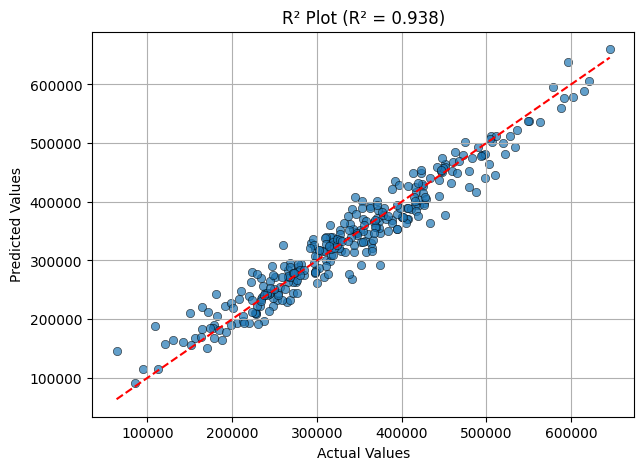

In [90]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, edgecolor='k')  # Scatter plot of actual vs predicted
sns.lineplot(x=y_test, y=y_test, color='red', linestyle='--')  # Ideal 1:1 line

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"R² Plot (R² = {r2:.3f})")
plt.grid(True)
plt.show()

In [95]:
from joblib import dump,load

In [ ]:
#saving the model for future use
dump(model,'model_mlr_final.joblib')

['model_lr_final.joblib']

In [ ]:
#loading it some other day for a new set of test data for deployment purposes
loaded_model_mlr=load('model_lr_final.joblib')